In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import preprocessing
import statsmodels.formula.api as smf
import scipy.stats as st

import os, sys, pandas, numpy ,patsy , re, random ,scipy,statsmodels
pd.set_option('expand_frame_repr', False) # augmente le nombre de variable par page en faisant print(notes)
pd.set_option('display.max_columns', 100) # Fixe le nombre de colonnes à aficher à 1000
pd.set_option('display.max_row', 1000) # Augmente le nombre de lignes à afficher

### Ce programme positionne ('is_genuine'=2)  des billets dont les variables, prises une à une, prennent 10% des plus basses et plus hautes valeurs.  Ceci afin de pouvoir afficher, en rouge, ces billets dans les graphiques qui suivent.

In [2]:
notes = pd.read_csv("notes.csv")   # 'notes' contient 170 billets avec leur caractéristiques

diagonal1 = notes.copy()
diagonal2 = notes.copy()
height_left1 = notes.copy()
height_left2 = notes.copy()
height_right1 = notes.copy()
height_right2 = notes.copy()
margin_low1 = notes.copy()
margin_low2 = notes.copy()
margin_up1 = notes.copy()
margin_up2 = notes.copy()
length1 = notes.copy()
length2 = notes.copy()

In [3]:
# notes.sort_values(by = 'length', ascending=False)
length1.loc[length1['length'] < 111.27, 'is_genuine'] = 2   # pour les 17 valeurs les plus basses
length2.loc[length2['length'] > 113.59, 'is_genuine'] = 2   # pour les 17 valeurs les plus hautes

# notes.sort_values(by = 'margin_low', ascending=False)
margin_low1.loc[margin_low1['margin_low'] < 3.82, 'is_genuine'] = 2
margin_low2.loc[margin_low2['margin_low'] > 5.71, 'is_genuine'] = 2

# notes.sort_values(by = 'margin_up', ascending=False)
margin_up1.loc[margin_up1['margin_up'] < 2.90, 'is_genuine'] = 2
margin_up2.loc[margin_up2['margin_up'] > 3.46, 'is_genuine'] = 2

# notes.sort_values(by = 'height_left', ascending=False)
height_left1.loc[height_left1['height_left'] < 103.70, 'is_genuine'] = 2
height_left2.loc[height_left2['height_left'] > 104.44, 'is_genuine'] = 2

# notes.sort_values(by = 'height_right', ascending=False)
height_right1.loc[height_right1['height_right'] < 103.49, 'is_genuine'] = 2
height_right2.loc[height_right2['height_right'] > 104.30, 'is_genuine'] = 2

# notes.sort_values(by = 'diagonal', ascending=False)
diagonal1.loc[diagonal1['diagonal'] < 171.59, 'is_genuine'] = 2
diagonal2.loc[diagonal2['diagonal'] > 172.30, 'is_genuine'] = 2


### Fonctions d'affichage

In [4]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import random
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


# ----------------------------------------------------------------------------------------------------
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, \
                             illustrative_var=None, continent=None, cluster=None):
    
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
#             fig = plt.figure(figsize=(7,6))
            fig = plt.figure(figsize=(11,10))
        
            # mon ajout
            color = ['black','yellowgreen','red','blue','orange','purple','green','cyan','azure','magenta','violet',\
                     'chartreuse','springgreen','indigo', 'brown','cadetblue','coral','cornflowerblue', 'cornsilk',\
                     'chocolate','tan','steelblue','turquoise', 'wheat', 'whitesmoke', \
                     'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', \
                     'silver', 'skyblue', 'slateblue', 'slategray', 'slategrey', 'springgreen', 'steelblue', 'tan', \
                     'teal', 'thistle', 'tomato']
            # le 'yellowgreen' est plus visible que le 'yellow'
        
            i=0
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                
                if continent is not None:
                    selected = np.where(illustrative_var == continent)
                    j=random.randint(0, 42)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=continent, c=[color[j]])
                elif cluster is not None:
                    selected = np.where(illustrative_var == cluster)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=cluster, marker='x')
                else:
                    for value in np.unique(illustrative_var):
                        selected = np.where(illustrative_var == value)
                        plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value, c=[color[i]])
                        i+=1

            plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                     plt.text(x+0.3, y+0.3, labels[i], fontsize='10', ha='center',va='center') 

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


# ----------------------------------------------------------------------------------------------------
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

# ----------------------------------------------------------------------------------------------------
def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.show()


## Affichage des Billets sur le 1er plan factoriel

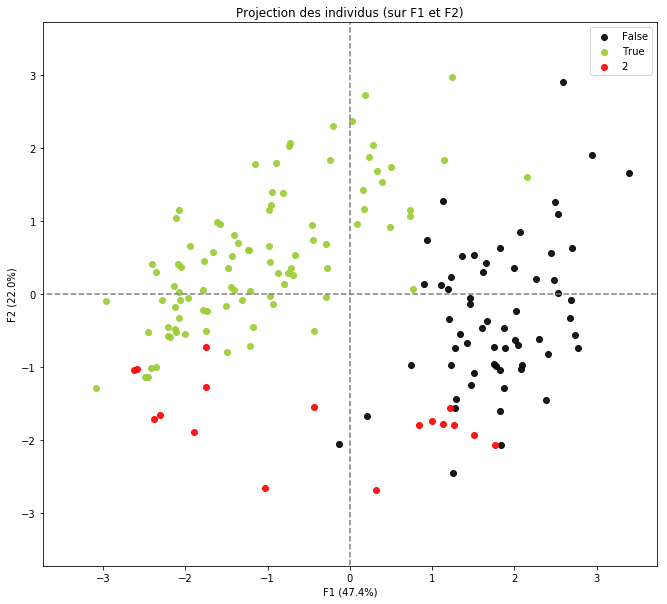

In [5]:
# ---------- diagonal1 ----------

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# Choix des variables à prendre en compte dans l'ACP
data_pca = diagonal1[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

genuine = diagonal1["is_genuine"]   # vrai ou faux billet

# conversion en numpy.ndarray => suppression du nom de colonne et ligne
X = data_pca.values        

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
pca.fit(X_scaled)                              # X_scaled contient maintenant les coordonnées factorielles

# Projection de tous les Billets sur le 1er plan factoriel (F1,F2)
X_projected = pca.transform(X_scaled)

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9)


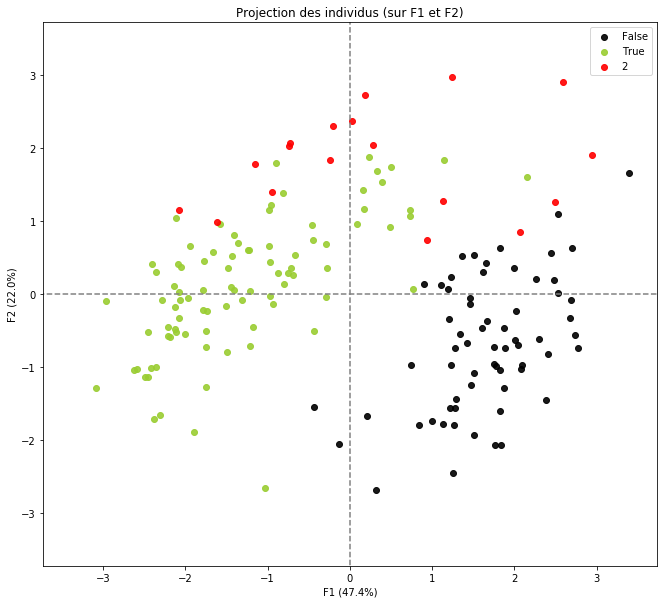

In [6]:
# ---------- diagonal2 ----------

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# Choix des variables à prendre en compte dans l'ACP
data_pca = diagonal2[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

genuine = diagonal2["is_genuine"]   # vrai ou faux billet

# conversion en numpy.ndarray => suppression du nom de colonne et ligne
X = data_pca.values        

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
pca.fit(X_scaled)                              # X_scaled contient maintenant les coordonnées factorielles

# Projection de tous les Billets sur le 1er plan factoriel (F1,F2)
X_projected = pca.transform(X_scaled)

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9)


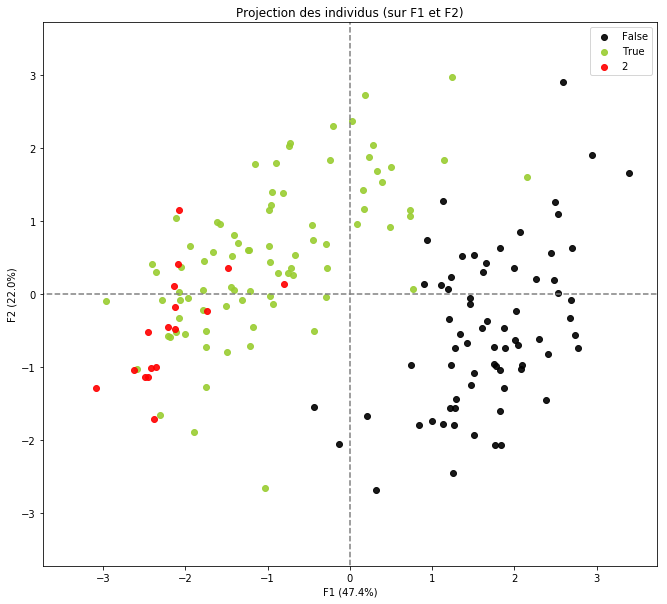

In [7]:
# ---------- height_left1 ----------

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# Choix des variables à prendre en compte dans l'ACP
data_pca = height_left1[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

genuine = height_left1["is_genuine"]   # vrai ou faux billet

# conversion en numpy.ndarray => suppression du nom de colonne et ligne
X = data_pca.values        

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
pca.fit(X_scaled)                              # X_scaled contient maintenant les coordonnées factorielles

# Projection de tous les Billets sur le 1er plan factoriel (F1,F2)
X_projected = pca.transform(X_scaled)

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9)


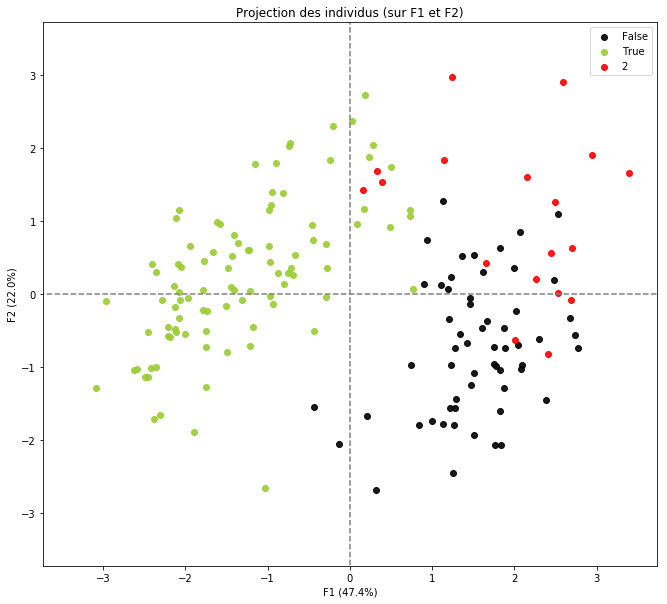

In [8]:
# ---------- height_left2 ----------

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# Choix des variables à prendre en compte dans l'ACP
data_pca = height_left2[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

genuine = height_left2["is_genuine"]   # vrai ou faux billet

# conversion en numpy.ndarray => suppression du nom de colonne et ligne
X = data_pca.values        

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
pca.fit(X_scaled)                              # X_scaled contient maintenant les coordonnées factorielles

# Projection de tous les Billets sur le 1er plan factoriel (F1,F2)
X_projected = pca.transform(X_scaled)

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9)

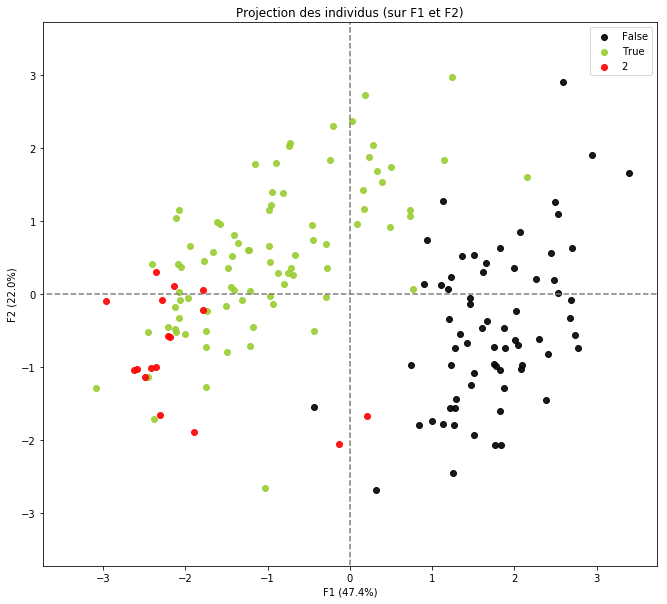

In [9]:
# ---------- height_right1 ----------

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# Choix des variables à prendre en compte dans l'ACP
data_pca = height_right1[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

genuine = height_right1["is_genuine"]   # vrai ou faux billet

# conversion en numpy.ndarray => suppression du nom de colonne et ligne
X = data_pca.values        

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
pca.fit(X_scaled)                              # X_scaled contient maintenant les coordonnées factorielles

# Projection de tous les Billets sur le 1er plan factoriel (F1,F2)
X_projected = pca.transform(X_scaled)

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9)

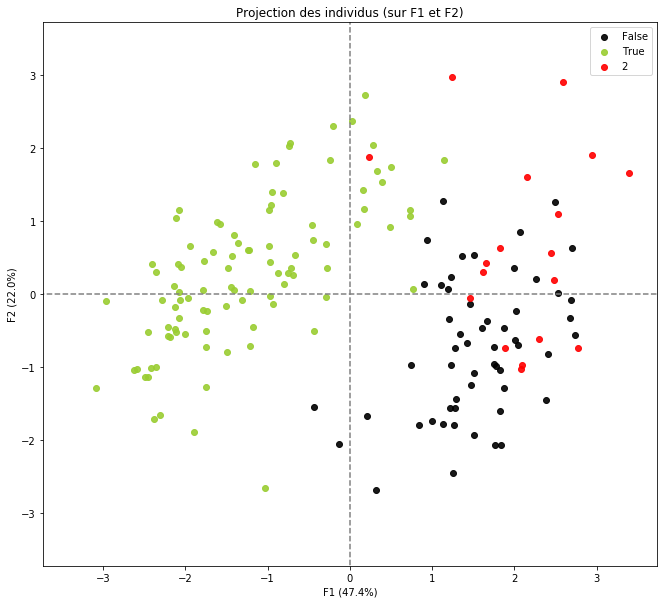

In [10]:
# ---------- height_right2 ----------

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# Choix des variables à prendre en compte dans l'ACP
data_pca = height_right2[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

genuine = height_right2["is_genuine"]   # vrai ou faux billet

# conversion en numpy.ndarray => suppression du nom de colonne et ligne
X = data_pca.values        

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
pca.fit(X_scaled)                              # X_scaled contient maintenant les coordonnées factorielles

# Projection de tous les Billets sur le 1er plan factoriel (F1,F2)
X_projected = pca.transform(X_scaled)

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9)

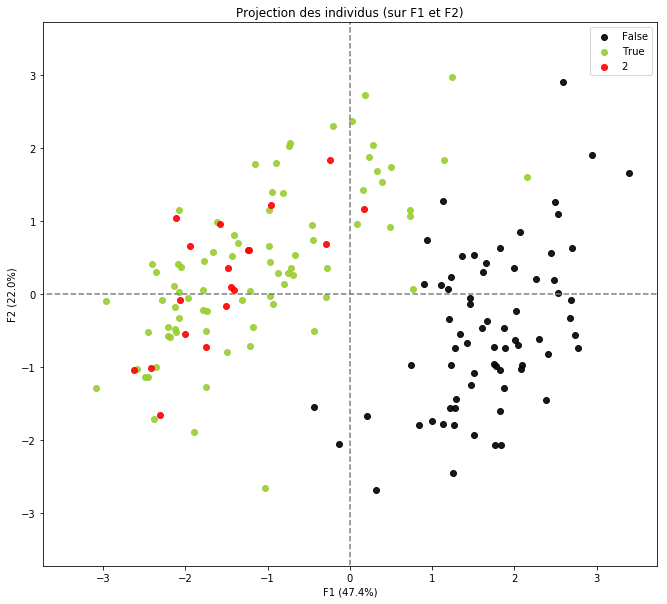

In [11]:
# ---------- margin_low1 ----------

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# Choix des variables à prendre en compte dans l'ACP
data_pca = margin_low1[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

genuine = margin_low1["is_genuine"]   # vrai ou faux billet

# conversion en numpy.ndarray => suppression du nom de colonne et ligne
X = data_pca.values        

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
pca.fit(X_scaled)                              # X_scaled contient maintenant les coordonnées factorielles

# Projection de tous les Billets sur le 1er plan factoriel (F1,F2)
X_projected = pca.transform(X_scaled)

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9)

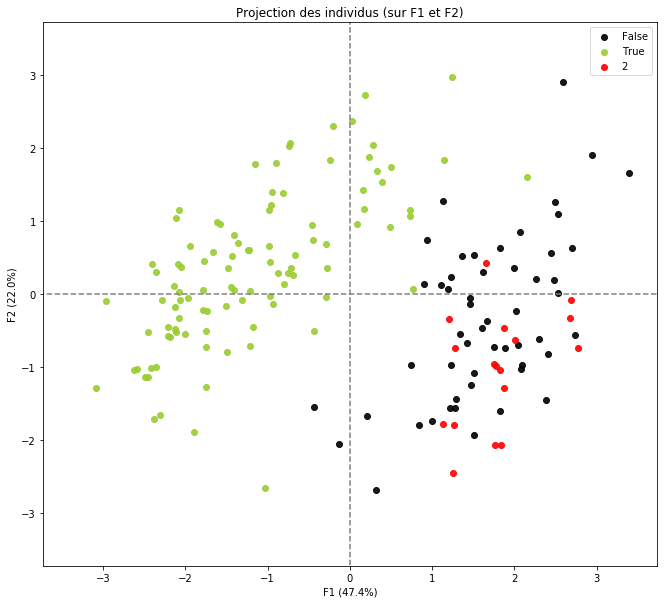

In [12]:
# ---------- margin_low2 ----------

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# Choix des variables à prendre en compte dans l'ACP
data_pca = margin_low2[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

genuine = margin_low2["is_genuine"]   # vrai ou faux billet

# conversion en numpy.ndarray => suppression du nom de colonne et ligne
X = data_pca.values        

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
pca.fit(X_scaled)                              # X_scaled contient maintenant les coordonnées factorielles

# Projection de tous les Billets sur le 1er plan factoriel (F1,F2)
X_projected = pca.transform(X_scaled)

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9)

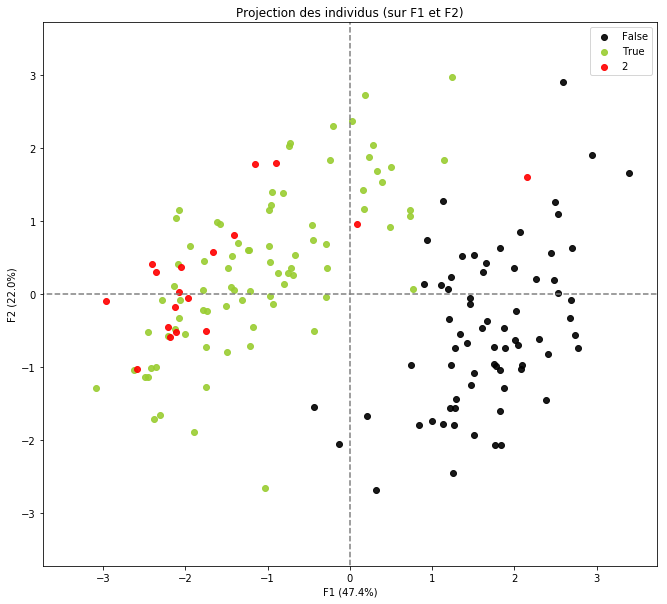

In [13]:
# ---------- margin_up1 ----------

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# Choix des variables à prendre en compte dans l'ACP
data_pca = margin_up1[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

genuine = margin_up1["is_genuine"]   # vrai ou faux billet

# conversion en numpy.ndarray => suppression du nom de colonne et ligne
X = data_pca.values        

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
pca.fit(X_scaled)                              # X_scaled contient maintenant les coordonnées factorielles

# Projection de tous les Billets sur le 1er plan factoriel (F1,F2)
X_projected = pca.transform(X_scaled)

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9)

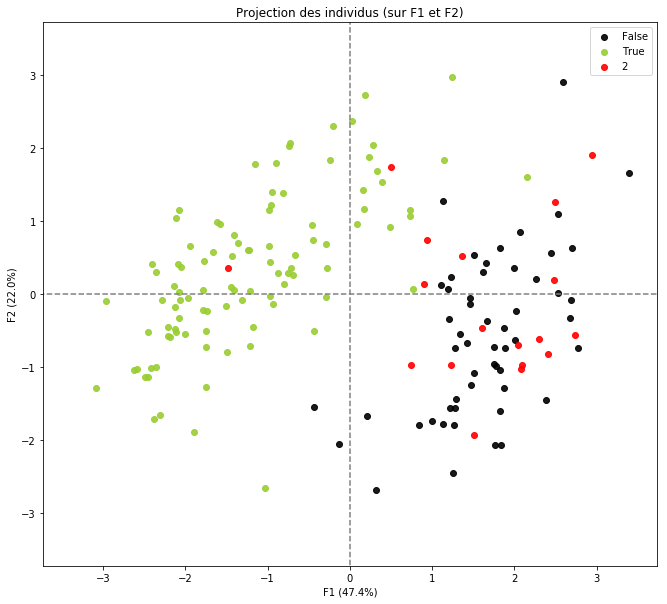

In [14]:
# ---------- margin_up2 ----------

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# Choix des variables à prendre en compte dans l'ACP
data_pca = margin_up2[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

genuine = margin_up2["is_genuine"]   # vrai ou faux billet

# conversion en numpy.ndarray => suppression du nom de colonne et ligne
X = data_pca.values        

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
pca.fit(X_scaled)                              # X_scaled contient maintenant les coordonnées factorielles

# Projection de tous les Billets sur le 1er plan factoriel (F1,F2)
X_projected = pca.transform(X_scaled)

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9)

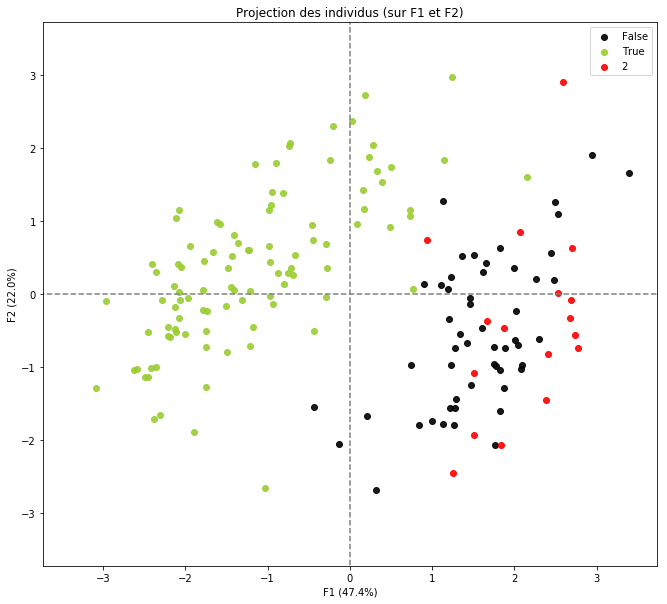

In [15]:
# ---------- length1 ----------

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# Choix des variables à prendre en compte dans l'ACP
data_pca = length1[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

genuine = length1["is_genuine"]   # vrai ou faux billet

# conversion en numpy.ndarray => suppression du nom de colonne et ligne
X = data_pca.values        

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
pca.fit(X_scaled)                              # X_scaled contient maintenant les coordonnées factorielles

# Projection de tous les Billets sur le 1er plan factoriel (F1,F2)
X_projected = pca.transform(X_scaled)

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9)

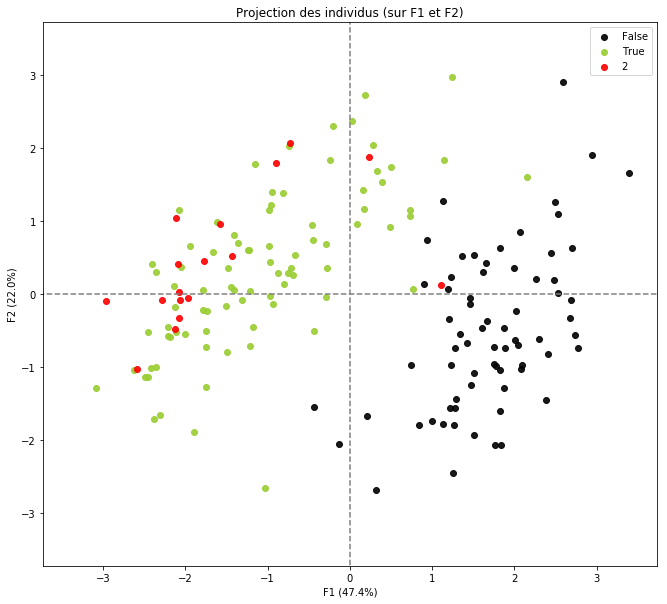

In [16]:
# ---------- length2 ----------

n_comp = 6   # Nombre de composantes à calculer : F1,F2,F3,F4,F5,F6

# Choix des variables à prendre en compte dans l'ACP
data_pca = length2[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

genuine = length2["is_genuine"]   # vrai ou faux billet

# conversion en numpy.ndarray => suppression du nom de colonne et ligne
X = data_pca.values        

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des 'n_comp' premières composantes principales
pca = decomposition.PCA(n_components=n_comp)   # pca de type 'sklearn.decomposition.pca.PCA'
pca.fit(X_scaled)                              # X_scaled contient maintenant les coordonnées factorielles

# Projection de tous les Billets sur le 1er plan factoriel (F1,F2)
X_projected = pca.transform(X_scaled)

# display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.9)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = genuine, alpha = 0.9)